# And the Oscar goes to ....

This is a great supervised learning problem: we’ve got a nice set of data with information (training data) that we suspect will help us predict who will win this year. This is called classification, since there are only two options for each datapoint: win or not win.
Now the problem is, we don’t know the important trends and relationships within our training data. Our goal is to come up with a program that models these relationships, so we can just input The Green Book and get back win.

</br>
<center>
    <img src =oscars.1.jpg width = 400 />
    *Tadaaaa...*
</center>

Let’s start simple:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## 1. Reading the dataset and Identify the anomalies

In [2]:
# Read in data as pandas dataframe and display the oscar dataset
dataset = pd.read_csv('OscarData.csv')
dataset.head()

,year,category,title,genres,MovieLensrating,runtimeMinutes,IMDBRating,imdb_numVotes,RottenCriticRating,rottencritic_numVotes,RottenRating,rotten_numVotes,won_bafta,won_sa,won_sag,won_cc,won_dga,won_nbra,won_oscar
0,1944,BEST PICTURE,Double Indemnity,Crime|Drama|Film-Noir,4.20,107,8.3,125662,96,57,95,35629,0,0,0,0,0,0,0
1,1944,BEST PICTURE,Gaslight,Drama|Thriller,4.03,114,7.8,20733,86,28,90,8460,0,0,0,0,0,0,0
2,1944,BEST PICTURE,Going My Way,Comedy|Drama|Musical,3.56,126,7.2,9228,79,24,76,5748,0,0,0,0,0,0,1
3,1944,BEST PICTURE,Since You Went Away,Drama|War,3.65,177,7.6,3879,80,10,82,1305,0,0,0,0,0,0,0
4,1944,BEST PICTURE,Wilson,Drama,3.21,154,6.8,1314,88,8,41,363,0,0,0,0,0,0,0


In [3]:
# Descriptive statistics for each column
dataset.describe()

,year,MovieLensrating,runtimeMinutes,IMDBRating,imdb_numVotes,RottenCriticRating,rottencritic_numVotes,RottenRating,rotten_numVotes,won_bafta,won_sa,won_sag,won_cc,won_dga,won_nbra,won_oscar
count,411.000000,411.000000,411.000000,411.000000,4.110000e+02,411.000000,411.000000,411.000000,4.110000e+02,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,1984.000000,3.744891,130.605839,7.703163,2.289712e+05,87.581509,117.270073,83.464720,6.384332e+05,0.133820,0.060827,0.053528,0.063260,0.170316,0.148418,0.182482
std,22.762185,0.295022,25.593356,0.481071,3.218728e+05,11.907778,114.005338,9.163586,4.055703e+06,0.340874,0.239304,0.225358,0.243727,0.376369,0.355948,0.386712
min,1944.000000,2.820000,84.000000,6.200000,1.147000e+03,0.000000,0.000000,41.000000,3.340000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1964.000000,3.565000,113.000000,7.400000,2.047700e+04,84.000000,30.000000,79.000000,9.507500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1985.000000,3.760000,126.000000,7.700000,9.304000e+04,91.000000,60.000000,85.000000,4.973300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2006.000000,3.935000,143.000000,8.000000,3.050575e+05,95.000000,212.500000,90.000000,1.798465e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2018.000000,4.720000,220.000000,9.300000,2.070726e+06,100.000000,472.000000,98.000000,3.579764e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
dataset = dataset.fillna(dataset.mean())
dataset.tail()

,year,category,title,genres,MovieLensrating,runtimeMinutes,IMDBRating,imdb_numVotes,RottenCriticRating,rottencritic_numVotes,RottenRating,rotten_numVotes,won_bafta,won_sa,won_sag,won_cc,won_dga,won_nbra,won_oscar
406,2018,BEST PICTURE,The Favourite,Drama|Comedy,3.82,119,7.7,103011,93,362,67,5754,0,1,0,0,0,0,0
407,2018,BEST PICTURE,Green Book,Drama|Comedy,3.94,130,8.3,170827,78,316,92,7859,0,0,0,0,0,1,1
408,2018,BEST PICTURE,Roma,Drama,3.76,135,7.8,100158,96,353,71,4667,1,1,0,1,1,0,0
409,2018,BEST PICTURE,A Star Is Born,Drama|Romance,3.67,135,7.8,229903,89,472,80,18019,0,1,0,0,0,0,0
410,2018,BEST PICTURE,Vice,Drama|Comedy,3.49,132,7.2,58938,66,326,58,3902,0,0,0,0,0,0,0


In [5]:
#feature list for variable importance
features = dataset.iloc[:,4:17]
feature_list = list(features.columns)
feature_list

['MovieLensrating',
 'runtimeMinutes',
 'IMDBRating',
 'imdb_numVotes',
 'RottenCriticRating',
 'rottencritic_numVotes',
 'RottenRating',
 'rotten_numVotes',
 'won_bafta',
 'won_sa',
 'won_sag',
 'won_cc',
 'won_dga']

In [6]:
#Divide the dataset into features(X) and the label(y) which we have to predict
X = dataset.iloc[:, 4 : 17].values
y = dataset.iloc[:, 18].values

In [7]:
print('The shape of our features is:', X.shape)

The shape of our features is: (411, 13)


In [8]:
#Viewing the sliced label data
y

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

## 2. Splitting the dataset into the Training set and Test set


Data is spilt with random_state = 0 that is the data remains the same throughout the entire execution and for all the algorithms. This is done to maintain consistency

In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.26, random_state = 0)

In [10]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (304, 13)
Training Labels Shape: (304,)
Testing Features Shape: (107, 13)
Testing Labels Shape: (107,)


Functions which will be used throughout the entire code

1. This function will be used plot the confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

2. This function will be used to plot the ROC curves

In [12]:
def evaluate_model(predictions_lr, probs_lr, train_predictions_lr, train_probs_lr):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions_lr)
    results['precision'] = precision_score(y_test, predictions_lr)
    results['roc'] = roc_auc_score(y_test, probs_lr)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions_lr)
    train_results['precision'] = precision_score(y_train, train_predictions_lr)
    train_results['roc'] = roc_auc_score(y_train, train_probs_lr)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs_lr)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'g', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

# Naive Bayes 
Naive Bayes is a very good method for classification as it uses probabilites for prediction. Since predicting oscars is using probabilities, this will be a good option.

The first 2 steps will be the same and now we move on to fit the Oscar data to the logisitic regression model

## 3. Fitting Naive Bayes to the training set

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## 4. Classes and Class prior based on model

In [14]:
print("Classes and their prior -")
print(classifier_nb.classes_[0], ":", round(classifier_nb.class_prior_[0],2))
print(classifier_nb.classes_[1], ":", round(classifier_nb.class_prior_[1],2))

Classes and their prior -
0 : 0.83
1 : 0.17


## 5. Assess Naive Bayes Performance

In [15]:
# Predicting the Test set results
y_pred_nb = classifier_nb.predict(X_test)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)

Confusion matrix, without normalization
[[82  3]
 [21  1]]


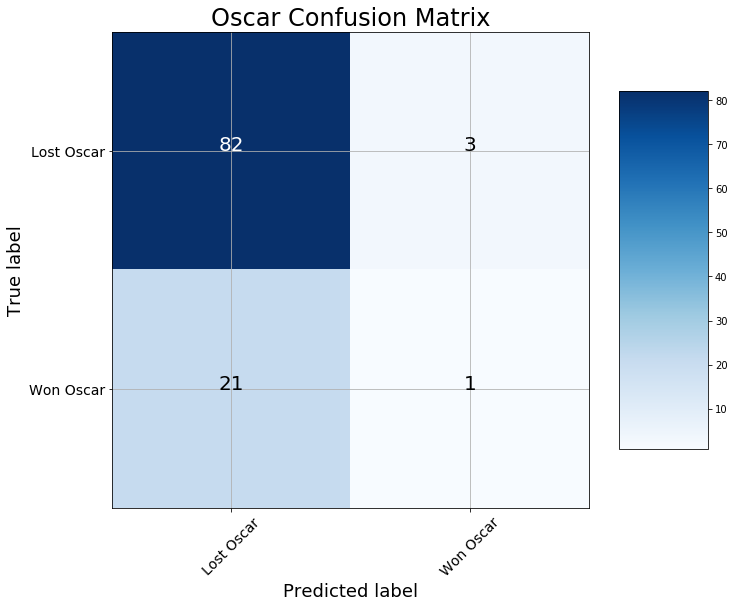

In [17]:
plot_confusion_matrix(cm, classes = ['Lost Oscar', 'Won Oscar'],
                      title = 'Oscar Confusion Matrix',cmap=plt.cm.Blues)

<b> This matrix shows that there are 82+1=83 correct predictions and only 21+3=24 incorrect predictions.
The naive bayes model predicts 21 false negatives which means the movies which actually won the oscar but predicted that the movie lost and the model also predicted 3 false postives which means the movies which actually lost the oscar but predicted that the movie won the oscar. So in all, the model predicts more false negatives which is good. This could be improved using a Random Forest Classifier</b>

In [18]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred_nb))

Accuracy 0.7757009345794392


In [19]:
# Make probability predictions
train_probs_nb = classifier_nb.predict_proba(X_train)[:, 1]
probs_nb = classifier_nb.predict_proba(X_test)[:, 1]

train_predictions_nb = classifier_nb.predict(X_train)
predictions_nb = classifier_nb.predict(X_test)

In [20]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_nb)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs_nb)}')

Train ROC AUC Score: 0.6678944598962641
Test ROC AUC  Score: 0.6053475935828877


In [21]:
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Baseline ROC AUC: 0.5


Recall Baseline: 1.0 Test: 0.05 Train: 0.13
Precision Baseline: 0.21 Test: 0.25 Train: 0.5
Roc Baseline: 0.5 Test: 0.61 Train: 0.67


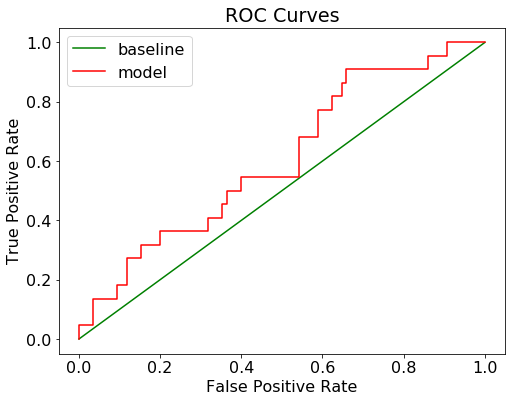

In [22]:
evaluate_model(predictions_nb, probs_nb, train_predictions_nb, train_probs_nb)

## 6. Finally our Naive Bayes Model predicts the Oscars

In [23]:
test_features = dataset[feature_list].values

pred_naive = classifier_nb.predict_proba(test_features)[:,1]
movie_name = np.array(dataset['title'])
year = np.array(dataset['year'])
won_oscar = np.array(dataset['won_oscar'])

In [24]:
naive_prediction = pd.DataFrame(pred_naive,movie_name,columns =["Probability"] )
naive_prediction["Year"] = year 
naive_prediction["Won Oscar"] = won_oscar

In [25]:
naive_prediction.tail(26)

,Probability,Year,Won Oscar
Arrival,0.050988,2016,0
Fences,0.026981,2016,0
Hacksaw Ridge,0.037200,2016,0
Hell or High Water,0.028102,2016,0
Hidden Figures,0.028228,2016,0
La La Land,0.041534,2016,0
Lion,0.028417,2016,0
Manchester by the Sea,0.029393,2016,0
Moonlight,0.029331,2016,1
Call Me by Your Name,0.027758,2017,0


</br>
<center>
    <img src = predictions.jpg width = 400 />
    *Please work...*
</center>

<b>The navie bayes model is a start to our machine learning classification problem for predicting the Oscars. It did not give us good results with the test data and it also does not predict correct results. It predicts "Bohemian Rhapsody" as the Oscar winner rather than the actual winner "Green Book"</b> 

# Logistic Regression 

Logistic regression is the go-to method for binary classification problems (problems with two class values). We started off our Oscar prediction with trying out logistic regression.

## 3. Fitting Logistic Regression to the data set

In [26]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0,solver="lbfgs")
classifier_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## 4. Assess Logistic Regression Performance

#### Confusion Matrix for Logistic Regression

In [27]:
# Predicting the Test set results
y_pred_lr = classifier_lr.predict(X_test)

Confusion matrix, without normalization
[[85  0]
 [21  1]]


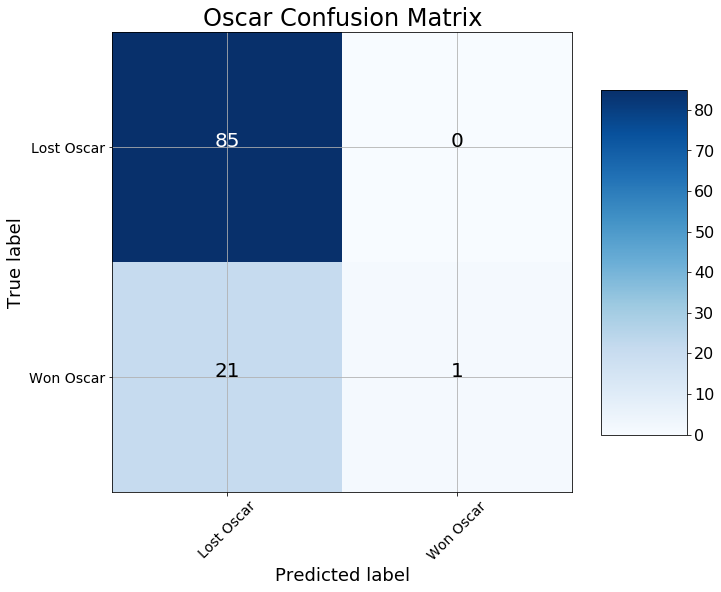

In [28]:
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lg, classes = ['Lost Oscar', 'Won Oscar'],
                      title = 'Oscar Confusion Matrix',cmap=plt.cm.Blues)

<b>This matrix shows that there are 85+1=86 correct predictions and only 21+1=22 incorrect predictions. The logistic regression model predicts 21 false negatives which means the movies which actually won the oscar but predicted that the movie lost and the model also predicted 0 false postives which means the movies which actually lost the oscar but predicted that the movie won the oscar. 


The logistic regression model does not give us great results. Too many false negatives and not correct predictions</b>

In [29]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred_lr))

Accuracy 0.8037383177570093


<b>Let's try the k-Fold Cross Validation is applied to improve the model performance</b>

"This approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k − 1 folds."

— Page 181, An Introduction to Statistical Learning, 2013.

In [30]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_lr = cross_val_score(estimator = classifier_lr, X = X_train, y = y_train, cv = 10)
accuracies_lr.mean()

0.8327486559139785

<b>The Logistic Regression performance shows 83% which is good in it's terms.</b>

Let's try and build a ROC curve to check the performance

In [31]:
# Make probability predictions
train_probs_lr = classifier_lr.predict_proba(X_train)[:, 1]
probs_lr = classifier_lr.predict_proba(X_test)[:, 1]

train_predictions_lr = classifier_lr.predict(X_train)
predictions_lr = classifier_lr.predict(X_test)

In [32]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_lr)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs_lr)}')

Train ROC AUC Score: 0.5874614748552959
Test ROC AUC  Score: 0.46310160427807484


In [33]:
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Baseline ROC AUC: 0.5


Recall Baseline: 1.0 Test: 0.05 Train: 0.13
Precision Baseline: 0.21 Test: 1.0 Train: 0.7
Roc Baseline: 0.5 Test: 0.46 Train: 0.59


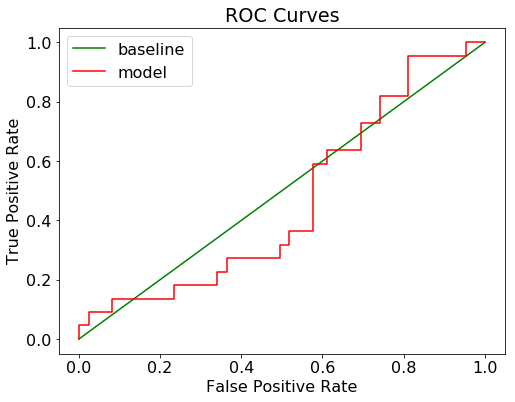

In [34]:
evaluate_model(predictions_lr, probs_lr, train_predictions_lr, train_probs_lr)

<b> Our Logistic regression gives a score of 59 for training data but 46 for test which are bad results.

## 5. Finally the Logistic Regression Model predicts the Oscars

In [35]:
# Separate the dataset into train and test to predict the Oscar's
train_lr = dataset[dataset['year']<=2000]
train_lr.tail()

,year,category,title,genres,MovieLensrating,runtimeMinutes,IMDBRating,imdb_numVotes,RottenCriticRating,rottencritic_numVotes,RottenRating,rotten_numVotes,won_bafta,won_sa,won_sag,won_cc,won_dga,won_nbra,won_oscar
277,2000,BEST PICTURE,Chocolat,Drama|Romance,3.68,121,7.3,167453,62,117,83,328835,0,0,0,0,0,0,0
278,2000,BEST PICTURE,"Crouching Tiger, Hidden Dragon",Action|Adventure|Fantasy,3.54,120,7.9,238676,97,153,86,427169,0,1,0,0,1,1,0
279,2000,BEST PICTURE,Erin Brockovich,Drama,3.58,131,7.3,157701,84,145,81,418491,0,0,0,0,0,0,0
280,2000,BEST PICTURE,Gladiator,Action|Adventure|Drama,3.96,155,8.5,1197072,76,194,87,34128074,1,0,0,1,0,0,1
281,2000,BEST PICTURE,Traffic,Crime|Drama|Thriller,3.80,147,7.6,185430,92,158,85,190305,0,1,1,0,0,0,0


In [36]:
test_lr = dataset[dataset['year']>2000]
test_lr.tail()

,year,category,title,genres,MovieLensrating,runtimeMinutes,IMDBRating,imdb_numVotes,RottenCriticRating,rottencritic_numVotes,RottenRating,rotten_numVotes,won_bafta,won_sa,won_sag,won_cc,won_dga,won_nbra,won_oscar
406,2018,BEST PICTURE,The Favourite,Drama|Comedy,3.82,119,7.7,103011,93,362,67,5754,0,1,0,0,0,0,0
407,2018,BEST PICTURE,Green Book,Drama|Comedy,3.94,130,8.3,170827,78,316,92,7859,0,0,0,0,0,1,1
408,2018,BEST PICTURE,Roma,Drama,3.76,135,7.8,100158,96,353,71,4667,1,1,0,1,1,0,0
409,2018,BEST PICTURE,A Star Is Born,Drama|Romance,3.67,135,7.8,229903,89,472,80,18019,0,1,0,0,0,0,0
410,2018,BEST PICTURE,Vice,Drama|Comedy,3.49,132,7.2,58938,66,326,58,3902,0,0,0,0,0,0,0


In [37]:
#target varaiable which you want to predict
target_lr = train_lr['won_oscar'].values
target_lr

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [38]:
#Define the feature names based on which you want the Oscar's to be predicted
feature_names_lr = [
    'won_bafta',
    'won_dga',
    'won_sa',
    'won_sag',
    'won_cc',
    'IMDBRating'
]
features_lr = train_lr[feature_names_lr].values
features_lr

array([[0. , 0. , 0. , 0. , 0. , 8.3],
       [0. , 0. , 0. , 0. , 0. , 7.8],
       [0. , 0. , 0. , 0. , 0. , 7.2],
       ...,
       [0. , 0. , 0. , 0. , 0. , 7.3],
       [1. , 0. , 0. , 0. , 1. , 8.5],
       [0. , 0. , 1. , 1. , 0. , 7.6]])

In [39]:
classifier_lr.fit(features_lr, target_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
test_features_lr = test_lr[feature_names_lr].values
pred_LR = classifier_lr.predict_proba(test_features_lr)[:,1]

In [41]:
movie_name = np.array(test_lr['title'])
year = np.array(test_lr['year'])
oscar = np.array(test_lr['won_oscar'])

In [42]:
prediction = pd.DataFrame(pred_LR.round(2), movie_name,columns =["Probability"] )
prediction["year"] = year
prediction["Actually Oscar"] = oscar

In [43]:
prediction.tail(26)

,Probability,year,Actually Oscar
Arrival,0.08,2016,0
Fences,0.07,2016,0
Hacksaw Ridge,0.07,2016,0
Hell or High Water,0.07,2016,0
Hidden Figures,0.08,2016,0
La La Land,0.82,2016,0
Lion,0.67,2016,0
Manchester by the Sea,0.05,2016,0
Moonlight,0.06,2016,1
Call Me by Your Name,0.08,2017,0


</br>
<center>
    <img src = notplanned.jpg width = 400 />
    Awkward....
</center>

<b>Well logistic regression model didn't go as planned either. It did not give us great results with the test data and it also does not predict correct results. It predicts "Roma" as the Oscar winner rather than the actual winner "Green Book"</b> 

# Decision Trees

A decision tree is the building block of a random forest and is an intuitive model. We can think of a decision tree as a series of yes/no questions asked about our data eventually leading to a predicted class. 

Presumably, the odds of an Oscar win could depend on critic ratings,IMDb ratings,previous awards won(BAFTA,SAG,NBRA) or even the genre. According to the Atlantic (see references below), dramas are more likely to win than any other category. And maybe a win also depends on the time of year the movie was released, so if the movie debuted near Oscars nominations season, you might have a better shot

https://www.theatlantic.com/entertainment/archive/2014/03/the-secrets-to-winning-an-academy-award/284158/

## 3. Fitting Decision Tree to the training set
To create a decision tree and train (fit) it on the data, we use Scikit-Learn.

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [45]:
print(f'Decision tree has {classifier_dt.tree_.node_count} nodes with maximum depth {classifier_dt.tree_.max_depth}.')

Decision tree has 61 nodes with maximum depth 8.


## 4. Variable Importance based on model

In [46]:
# Get numerical feature importances
importances_tree = list(classifier_dt.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_tree)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: won_dga              Importance: 0.43
Variable: rottencritic_numVotes Importance: 0.14
Variable: runtimeMinutes       Importance: 0.09
Variable: rotten_numVotes      Importance: 0.08
Variable: RottenCriticRating   Importance: 0.07
Variable: MovieLensrating      Importance: 0.05
Variable: IMDBRating           Importance: 0.05
Variable: imdb_numVotes        Importance: 0.05
Variable: RottenRating         Importance: 0.05
Variable: won_bafta            Importance: 0.0
Variable: won_sa               Importance: 0.0
Variable: won_sag              Importance: 0.0
Variable: won_cc               Importance: 0.0


## 5. Visualization of the Decision Tree Model

In [47]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Export the image to a dot file
export_graphviz(classifier_dt, out_file = 'tree_oscars_dt.dot', feature_names = feature_list, class_names=['won','lost'],max_depth = 10,rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_oscars_dt.dot')

# Write graph to a png file
graph.write_png('tree_oscars_dt.png'); 

<br />
<center>
<img src = tree_oscars_dt.png width = 1000 />
</center>

## 6. Assess Decision Tree Performance

<b> Confusion Matrix for Decision Tree </b>

In [48]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

Confusion matrix, without normalization
[[75 10]
 [ 9 13]]


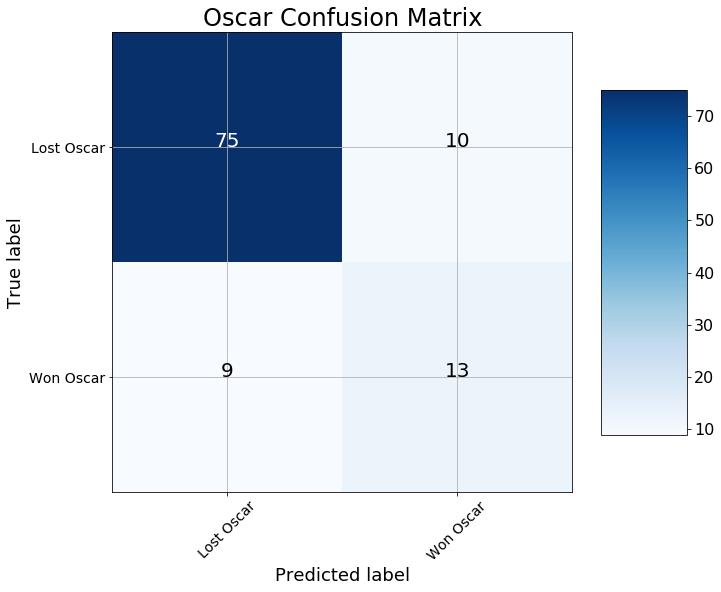

In [50]:
plot_confusion_matrix(cm_dt, classes = ['Lost Oscar', 'Won Oscar'],
                      title = 'Oscar Confusion Matrix',cmap=plt.cm.Blues)

<b> This matrix shows that there are 75+13=88 correct predictions and only 10+9=19 incorrect predictions.
The decision tree model predicts 9 false negatives which means the movies which actually won the oscar but predicted that the movie lost and the model also predicted 10 false postives which means the movies which actually lost the oscar but predicted that the movie won the oscar. So in all, the model predicts more false positives which is bad. This could be improved using a Random Forest Classifier</b>

In [51]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred_dt))

Accuracy 0.822429906542056


<b>Let's try the k-Fold Cross Validation is applied to improve the model performance</b>

In [52]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train, cv = 10)
accuracies_dt.mean()

0.8714852150537634

<b>The Decision tree performance is 87% which is decent.</b>

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

In [53]:
# Make probability predictions
train_probs_dt = classifier_dt.predict_proba(X_train)[:, 1]
probs_dt = classifier_dt.predict_proba(X_test)[:, 1]

train_predictions_dt = classifier_dt.predict(X_train)
predictions_dt = classifier_dt.predict(X_test)

In [54]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_dt)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs_dt)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.7366310160427807


In [55]:
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Baseline ROC AUC: 0.5


Recall Baseline: 1.0 Test: 0.59 Train: 1.0
Precision Baseline: 0.21 Test: 0.57 Train: 1.0
Roc Baseline: 0.5 Test: 0.74 Train: 1.0


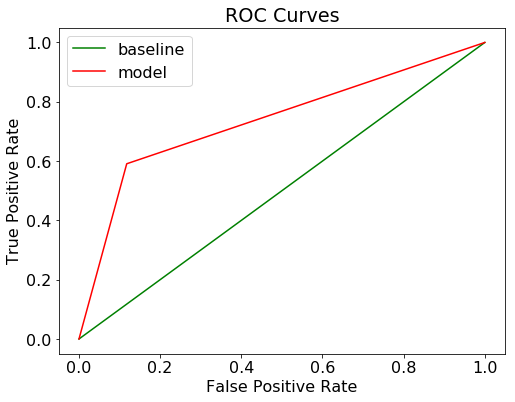

In [56]:
evaluate_model(predictions_dt, probs_dt, train_predictions_dt, train_probs_dt)

<b>Our decision tree for Oscars achieves the perfect score for the training data. But the test data is not great, and can be seen that there is overfitting of the training data.</b>

## 7. Finally our Decision Tree Model predicts the Oscars

In [57]:
test_features = dataset[feature_list].values

pred_tree = classifier_dt.predict_proba(test_features)[:,1]
movie_name = np.array(dataset['title'])
year = np.array(dataset['year'])
won_oscar = np.array(dataset['won_oscar'])


In [58]:
tree_prediction = pd.DataFrame(pred_tree,movie_name,columns =["Probability"] )
tree_prediction["Year"] = year 
tree_prediction["Won Oscar"] = won_oscar

In [59]:
tree_prediction.tail(20)

,Probability,Year,Won Oscar
Lion,1.0,2016,0
Manchester by the Sea,0.0,2016,0
Moonlight,1.0,2016,1
Call Me by Your Name,0.0,2017,0
Darkest Hour,0.0,2017,0
Dunkirk,0.0,2017,0
Get Out,0.0,2017,0
Ladybird,0.0,2017,0
Phantom Thread,0.0,2017,0
The Post,0.0,2017,0


</br>
<center>
    <img src =working.gif width = 400 />
    *Yassss...*
</center>

<b>The decision tree predicts the correct Oscar winner and did way better than logisitc regression model.Andddd the Decision tree predicts "Green Book" as the winner.Yay!  </b>

But not so good results with the model accuracy and performance. We could try to improve the results by trying another classifier

# Random Forest Classifier 

The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.

<b>Not great results using a decision tree as we can see above. Let's try using a Random Forest Classifier</b>

Here we directly jump to the <b>3rd</b> step from above. As we have done the data pre-processing in the decision tree steps

## 3. Fitting Random Forest to the training set
To create a decision tree and train (fit) it on the data, we use Scikit-Learn.

In [60]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100,random_state = 0,criterion = 'entropy')
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## 4. Variable Importance based on model

In [61]:
# Get numerical feature importances
importances_forest = list(classifier_rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_forest)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: won_dga              Importance: 0.31
Variable: rottencritic_numVotes Importance: 0.12
Variable: imdb_numVotes        Importance: 0.09
Variable: rotten_numVotes      Importance: 0.09
Variable: MovieLensrating      Importance: 0.07
Variable: runtimeMinutes       Importance: 0.07
Variable: RottenCriticRating   Importance: 0.07
Variable: IMDBRating           Importance: 0.06
Variable: RottenRating         Importance: 0.06
Variable: won_bafta            Importance: 0.02
Variable: won_cc               Importance: 0.02
Variable: won_sa               Importance: 0.01
Variable: won_sag              Importance: 0.01


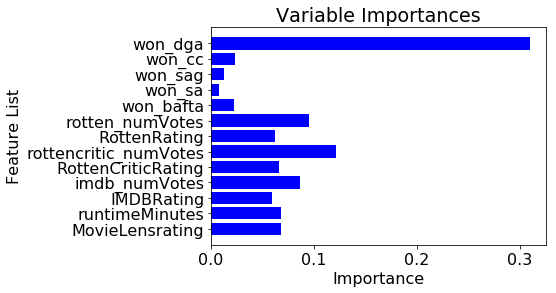

In [62]:
# list of x locations for plotting
x_values = list(range(len(importances_forest)))

# Make a horizontal bar chart
plt.barh(x_values, importances_forest,color="blue",align="center")

# Tick labels for y axis
plt.yticks(x_values, feature_list)
#plt.ylim(-0.5,11.5)

# Axis labels and title
plt.ylabel('Feature List'); plt.xlabel('Importance'); plt.title('Variable Importances'); 

## 5. Visualization of the Random Forest Model

In [63]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = classifier_rf.estimators_[13]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree_oscars_rf.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_oscars_rf.dot')

# Write graph to a png file
graph.write_png('tree_oscars_rf.png'); 

<br />
<center>
<img src = tree_oscars_rf.png width = 1000 />
</center>

In [64]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 14


In [65]:
# Limit depth of tree to 2 levels
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 4,criterion = 'entropy', random_state = 0)
rf_small.fit(X_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_oscars.dot', feature_names = feature_list, class_names=['won','lost'],rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree_oscars.dot')

graph.write_png('small_tree_oscars.png');

<br/>
<center>
<img src = small_tree_oscars.png width = 1000 />
</center>

## 6. Assess Random Forest Performance

<b> Confusion Matrix for Random Forest </b>

In [66]:
# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

In [67]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

Confusion matrix, without normalization
[[82  3]
 [11 11]]


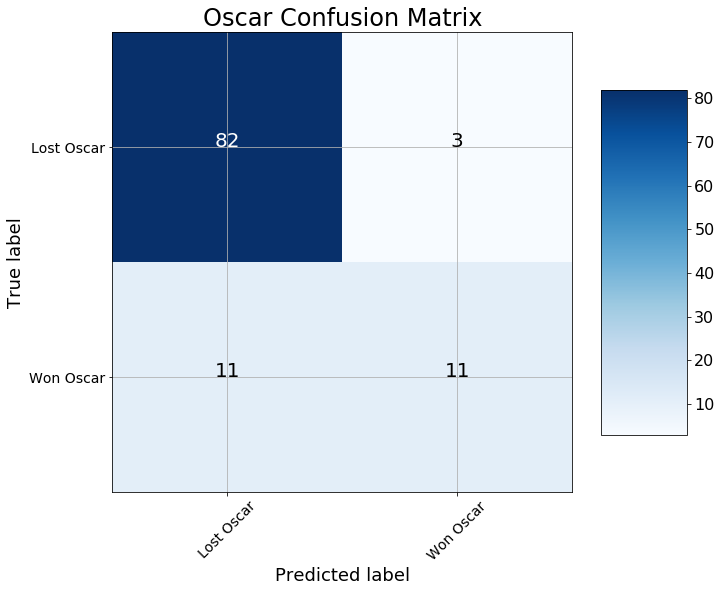

In [68]:
plot_confusion_matrix(cm_rf, classes = ['Lost Oscar', 'Won Oscar'],
                      title = 'Oscar Confusion Matrix',cmap=plt.cm.Blues)

<b> This matrix shows that there are 82+11=93 correct predictions and only 11+3=14 incorrect predictions. This seems to be a better model than the decision tree.

The random forest model predicts 11 false negatives which means the movies which actually won the oscar but predicted that the movie lost and the model also predicted 3 false postives which means the movies which actually lost the oscar but predicted that the movie won the oscar.

Using the random forest model the false positives are lesser,which means our model is headed in the right direction and is doing better than the decision tree model</b>

In [69]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy 0.8691588785046729


<b>Let's try the k-Fold Cross Validation is applied to improve the model performance</b>

In [70]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_rf = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train, cv = 10)
accuracies_rf.mean()

0.9009543010752689

<b>The Random Forest performance is 90% which is better than the Decision tree's model.</b>

In [71]:
# Make probability predictions
train_probs_rf = classifier_rf.predict_proba(X_train)[:, 1]
probs_rf = classifier_rf.predict_proba(X_test)[:, 1]

train_predictions_rf = classifier_rf.predict(X_train)
predictions_rf = classifier_rf.predict(X_test)

In [72]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_rf)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs_rf)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9379679144385027


In [73]:
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Baseline ROC AUC: 0.5


Recall Baseline: 1.0 Test: 0.5 Train: 1.0
Precision Baseline: 0.21 Test: 0.79 Train: 1.0
Roc Baseline: 0.5 Test: 0.94 Train: 1.0


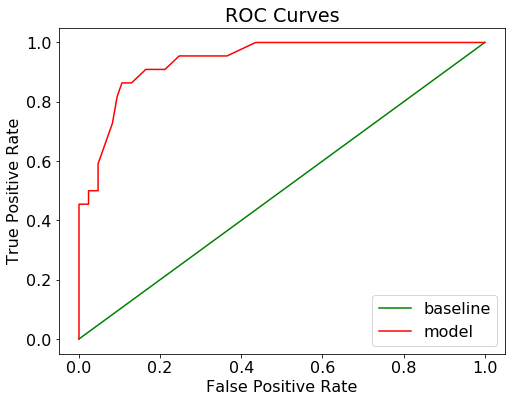

In [74]:
evaluate_model(predictions_rf, probs_rf, train_predictions_rf, train_probs_rf)

<b>Sooo, our random forest model has done wayy better than the deicison tree model. The training data as usual is perfect, but the testing data has also done a better with a Roc of 0.94. Also the AUC is greater which means its a better model for our Oscar data.</b>

## 7. Finally our Decision Tree Model predicts the Oscars

In [75]:
test_features = dataset[feature_list].values

pred_forest = classifier_rf.predict_proba(test_features)[:,1]
movie_name = np.array(dataset['title'])
year = np.array(dataset['year'])
won_oscar = np.array(dataset['won_oscar'])

In [76]:
forest_prediction = pd.DataFrame(pred_forest,movie_name,columns =["Probability"] )
forest_prediction["Year"] = year 
forest_prediction["Won Oscar"] = won_oscar

In [77]:
forest_prediction.tail(20)

,Probability,Year,Won Oscar
Lion,0.65,2016,0
Manchester by the Sea,0.02,2016,0
Moonlight,0.69,2016,1
Call Me by Your Name,0.01,2017,0
Darkest Hour,0.03,2017,0
Dunkirk,0.01,2017,0
Get Out,0.02,2017,0
Ladybird,0.06,2017,0
Phantom Thread,0.07,2017,0
The Post,0.09,2017,0


<b>Model Accuracy is better and the Oscar Prediction shows the correct result!.
    
    And we predict Green Book as the winner with a higher probability.
    
 *Let us check for the ever so famous "La La Land" and "Moon Light" for 2016*</b>

In [78]:
forest_prediction.loc[forest_prediction['Year'] == 2016]

,Probability,Year,Won Oscar
Arrival,0.04,2016,0
Fences,0.01,2016,0
Hacksaw Ridge,0.07,2016,0
Hell or High Water,0.01,2016,0
Hidden Figures,0.02,2016,0
La La Land,0.19,2016,0
Lion,0.65,2016,0
Manchester by the Sea,0.02,2016,0
Moonlight,0.69,2016,1


## Conclusion

<b>The random forest still predicts Moonlight as the Oscar Winner.* Well the data cannot go wrong and we users really were rooting for La La Land to win. According to the data our model is correct.


So the Random Forest predicts "Green Book" as the Best Picture winner. 

We have predicted the correct Oscar winners for the 2019 which is "Green Book". Not to brag our model also predicted that 2018 winners "The Shape of Water".

    All in all we predicted pretty good results with training the machine from data all the way from 1944.

</b>


<center>
    <img src =giphy.gif width = 600 />
    *It was all worth it...*
</center>

